In [2]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
%matplotlib notebook


### build the dipatcher object

In [33]:
#Public
#disp=DispatcherAPI(host='cdcicn01.isdc.unige.ch:32003/dispatch-data',instrument='mock')
#Internal with access to NRT
disp=DispatcherAPI(host='cdcicn01.isdc.unige.ch/staging-1.1/dispatcher',instrument='mock')

#disp=DispatcherAPI(host='0.0.0.0',port=5000,instrument='mock')
 

In [34]:
instr_list=disp.get_instruments_list()
for i in instr_list:
    print (i)

isgri
jemx
polar


### get the description of the instrument

In [35]:
disp.get_instrument_description('isgri')


--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 
 name: osa_version,  value: None,  units: str, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 

--------------
query_name: isgri_spectrum_query
 product_name: isgri_spectrum

----

### get the description of the product


In [36]:
disp.get_product_description(instrument='isgri',product_name='isgri_image')

--------------
parameters for  product isgri_image and instrument isgri

--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 
 name: osa_version,  value: None,  units: str, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 


### check query before submission
we pass 'dry_run' to check if the request is correct without actually submitting it

In [8]:
#data=disp.get_product(instrument='isgri',
#                      product='isgri_image',
#                      T1='2003-03-15T23:27:40.0',
#                      T2='2003-03-16T00:03:12.0',
#                      osa_version='OSA10.2',
#                      RA='a',
#                      DEC=-37.844167,
#                      detection_threshold=5.0,
#                      radius=15.,
#                      product_type='Real',
#                      dry_run=True)

### get the product
now we skip the dry_run to actually get the products

In [9]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:15.0',
                      E1_keV=20.0,
                      E2_keV=40.0,
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real')

waiting for remote response, please wait run_analysis http://cdcicn01.isdc.unige.ch:32003/dispatch-data
the job has been submitted on the remote server
 | the job is working remotely, please wait status=done - job_id=-6235342954244489107  07  

query done succesfully!


### the ODA data structure

In [10]:
data=data[0]
data.show()

------------------------------
name: mosaic_image
meta_data ['src_name', 'instrument', 'product', 'query_parameters']
number of data units 1
------------------------------
data uniti 0 ,name: ISGR-MOSA-IMA


In [11]:
data.show_meta()

------------------------------
src_name : 
instrument : isgri
product : mosaic
query_parameters : [{"query_name": "isgri_image_query"}, {"product_name": "isgri_image_query"}, {"units": "sigma", "name": "detection_threshold", "value": "5.0"}, {"units": null, "name": "image_scale_min", "value": null}, {"units": null, "name": "image_scale_max", "value": null}]
------------------------------


In [12]:
hdu=data.to_fits_hdu_list()

In [20]:
hdu[0].data.shape

(455, 455)

In [21]:
data.write_fits_file('test.fits',overwrite=True)

### the ODA Image   plotting tool

In [22]:
%matplotlib notebook
im=OdaImage(data)

<IPython.core.display.Javascript object>


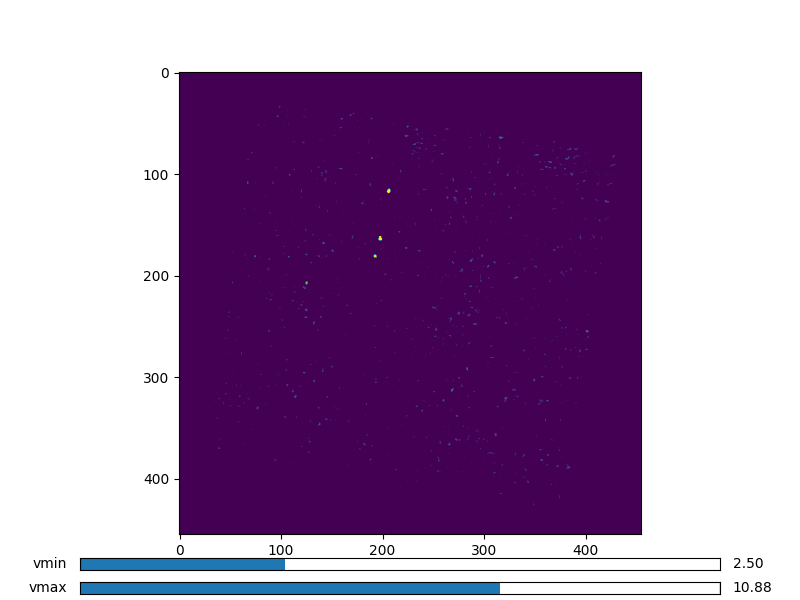

In [23]:
im.show()

In [25]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  455                                                  
NAXIS2  =                  455                                                  
ORIGIN  = 'ISDC    '                                                            
CHANMIN =                   20                                                  
DATASUM = '1736760768'                                                          
TIMESYS = 'TT      '                                                            
HDUDOC  = 'ISDC-IBIS ICD'                                                       
E_MEAN  =                 30.0                                                  
TLAST   =     1169.99724526505                                                  
DATE-OBS= '2003-03-15T23:27:

### the ODA LC  plotting tool

In [26]:
data=disp.get_product(instrument='isgri',
                      product='isgri_lc',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=70,
                      query_type='Real',
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real')

waiting for remote response, please wait run_analysis http://cdcicn01.isdc.unige.ch:32003/dispatch-data
the job has been submitted on the remote server
 - the job is working remotely, please wait status=done - job_id=815032431550934891  891 

query done succesfully!


In [27]:
d=data[5]

In [28]:
d.meta_data

{'rate': 'RATE',
 'rate_err': 'ERROR',
 'src_name': 'IGR J17586-2129',
 'time': 'TIME',
 'time_bin': 0.000810143479094966}

In [29]:
for s in data:
    print (s.meta_data)

{'src_name': 'GX 349+2', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'IGR J17285-2922', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'AX J1700.2-4220', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'IGR J17507-2856', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'IGR J17508-3219', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'IGR J17586-2129', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'OAO 1657-415', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'GRO J1719-24', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': '4U 1735-444', 'rate': 'RATE', 'time_bin': 0.000

In [40]:
lc=data[0]

In [41]:
lc.show()

------------------------------
name: isgri_lc
meta_data ['src_name', 'rate', 'time_bin', 'rate_err', 'time']
number of data units 2
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: ISGR-SRC.-LCR


In [42]:
lc.meta_data

{'rate': 'RATE',
 'rate_err': 'ERROR',
 'src_name': 'GX 349+2',
 'time': 'TIME',
 'time_bin': 0.000810143479094966}

<IPython.core.display.Javascript object>


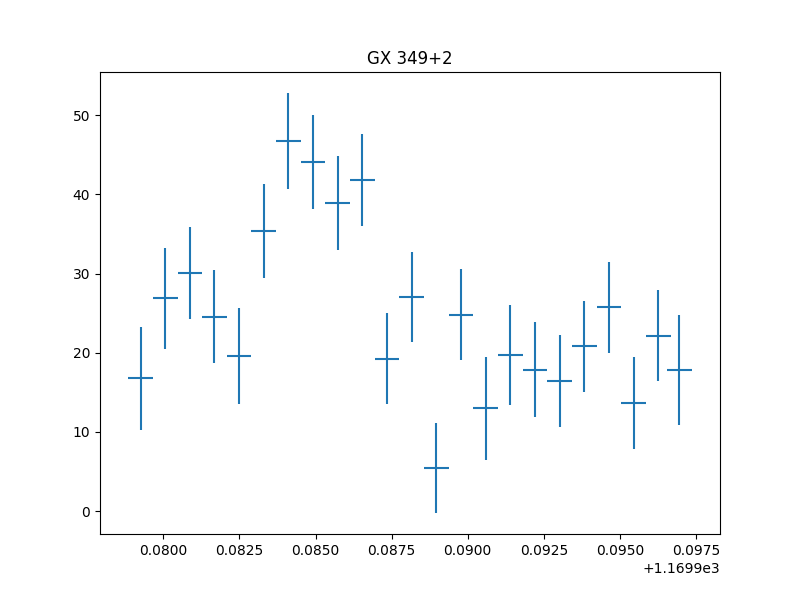

In [43]:
OdaLightCurve(lc).show(unit_ID=1)

In [ ]:
lc.data_uint[0].header

### Polar LC

In [44]:
data=disp.get_product(instrument='polar',product='polar_lc',T1='2016-12-18T08:32:21.000',T2='2016-12-18T08:34:01.000',time_bin=0.1,verbose=True,dry_run=False)

waiting for remote response, please wait run_analysis http://cdcicn01.isdc.unige.ch/staging-1.1/dispatcher


query done succesfully!


In [45]:
lc=data[0]

<IPython.core.display.Javascript object>


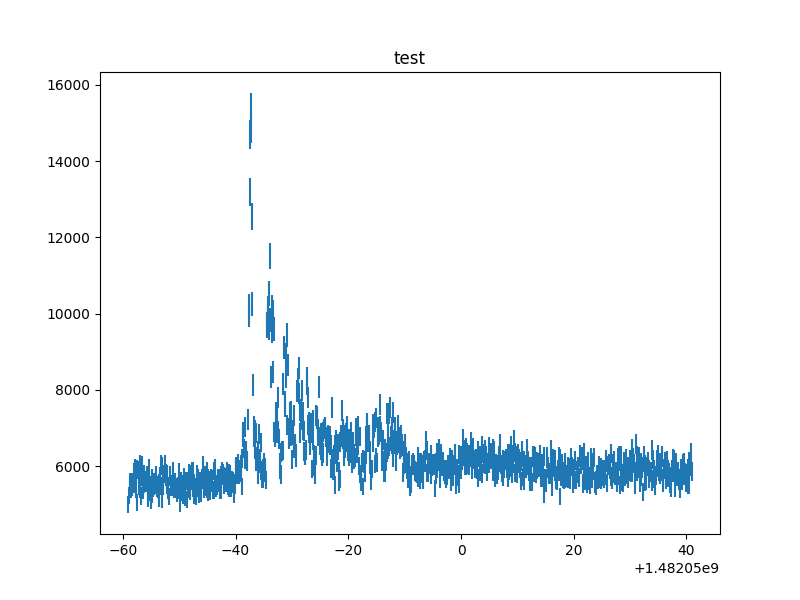

In [46]:
OdaLightCurve(lc).show(unit_ID=0)

### the ODA  and spectra

In [47]:
data=disp.get_product(instrument='isgri',
                      product='isgri_spectrum',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=50,
                      query_type='Real',
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real')

waiting for remote response, please wait run_analysis http://cdcicn01.isdc.unige.ch/staging-1.1/dispatcher
the job has been submitted on the remote server
 - the job is working remotely, please wait status=done - job_id=-1255063856769622835  835 

query done succesfully!


In [48]:
for ID,s in enumerate(data):
    print (ID,s.meta_data)

(0, {'src_name': 'GX 349+2', 'product': 'isgri_spectrum'})
(1, {'src_name': 'GX 349+2', 'product': 'isgri_arf'})
(2, {'src_name': 'GX 349+2', 'product': 'isgri_rmf'})
(3, {'src_name': 'IGR J17285-2922', 'product': 'isgri_spectrum'})
(4, {'src_name': 'IGR J17285-2922', 'product': 'isgri_arf'})
(5, {'src_name': 'IGR J17285-2922', 'product': 'isgri_rmf'})
(6, {'src_name': 'AX J1700.2-4220', 'product': 'isgri_spectrum'})
(7, {'src_name': 'AX J1700.2-4220', 'product': 'isgri_arf'})
(8, {'src_name': 'AX J1700.2-4220', 'product': 'isgri_rmf'})
(9, {'src_name': 'IGR J17507-2856', 'product': 'isgri_spectrum'})
(10, {'src_name': 'IGR J17507-2856', 'product': 'isgri_arf'})
(11, {'src_name': 'IGR J17507-2856', 'product': 'isgri_rmf'})
(12, {'src_name': 'IGR J17508-3219', 'product': 'isgri_spectrum'})
(13, {'src_name': 'IGR J17508-3219', 'product': 'isgri_arf'})
(14, {'src_name': 'IGR J17508-3219', 'product': 'isgri_rmf'})
(15, {'src_name': 'IGR J17586-2129', 'product': 'isgri_spectrum'})
(16, {'sr

In [49]:
data[87].write_fits_file('spec.fits')
data[88].write_fits_file('arf.fits')
data[89].write_fits_file('rmf.fits')


In [50]:
s.show()

------------------------------
name: 
meta_data ['src_name', 'product']
number of data units 4
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: GROUPING
data uniti 2 ,name: ISGR-RMF.-RSP
data uniti 3 ,name: ISGR-EBDS-MOD


In [51]:
d=data[3]

In [61]:
d.data_unit[0].data

### spectral fitting with threeML

In [62]:
from threeML.plugins.OGIPLike import  OGIPLike
from threeML.io.package_data import get_path_of_data_file
from threeML import *


ImportError: No module named threeML.plugins.OGIPLike

In [ ]:

ogip_data = OGIPLike('ogip',
                     observation='spec.fits',
                     arf_file= 'arf.fits' ,
                     response= 'rmf.fits')

In [ ]:
ogip_data.set_active_measurements('20-60')


In [ ]:
ogip_data.view_count_spectrum()
plt.ylim(1E-5,10)


In [ ]:

fit_function = Cutoff_powerlaw()

# define the point source
point_source = PointSource('ps', 0, 0, spectral_shape=fit_function)

#define the model
model = Model(point_source)

# create a data list
datalist = DataList(ogip_data)

# make the joint likelihood
jl = JointLikelihood(model, datalist)

#fit
jl.fit();

In [ ]:
display_spectrum_model_counts(jl, step=True);


In [ ]:
plot_point_source_spectra(jl.results, ene_min=20, ene_max=60, num_ene=100,
                          flux_unit='erg / (cm2 s)')

In [ ]:

# A uniform prior can be defined directly, like:
model.ps.spectrum.main.Cutoff_powerlaw.index.prior = Uniform_prior(lower_bound=-2.,
                                                                     upper_bound=2.)

# or it can be set using the currently defined boundaries
model.ps.spectrum.main.Cutoff_powerlaw.xc.prior=  Uniform_prior(lower_bound=0,
                                                                     upper_bound=100)


# The same for the Log_uniform prior
model.ps.spectrum.main.Cutoff_powerlaw.K.prior = Log_uniform_prior(lower_bound=1e-3,
                                                                     upper_bound=100)


model.display()

In [ ]:
bs = BayesianAnalysis(model, datalist)

# This uses the emcee sampler
samples = bs.sample(n_walkers=30, burn_in=100, n_samples=1000)

In [ ]:
bs.results.display()

In [ ]:
bs.results.corner_plot()

In [ ]:
plot_point_source_spectra(bs.results, ene_min=20, ene_max=60, num_ene=100,
                          flux_unit='erg / (cm2 s)')

In [ ]:

fluxes_bs = bs.results.get_point_source_flux(100 * u.keV, 1 * u.MeV)